In [1]:
import pandas as pd
import datetime as dt
import xm_query as xq


In [24]:
xq.inven_met['Recursos']['Horaria']['var'].keys()

dict_keys(['Generacion Ideal', 'Generacion Real', 'Consumo Combustible Aprox. Factor de Emisión', 'Precio de Oferta del Despacho', 'Emisiones CO2e', 'Generación Seguridad', 'Generación Fuera de Merito'])

In [27]:
sd = dt.date(2015, 1, 1)
ed = dt.date(2021, 1, 31)
item = 'Recursos'
freq = 'Horaria'
qry = ['Precio de Oferta del Despacho']
df1 = xq.xmQueryAPI(item, sd, ed, freq, var=qry, save=False)
df1.to_csv('..\..\Barranquilla\Recursos.csv', sep=',', index=False)
df1

,id,sub_mercado,PrecOferDesp,fecha_hora
0,Recurso,ALBG,200.000,2015-01-01 00:00:00
1,Recurso,CHBG,300.000,2015-01-01 00:00:00
2,Recurso,CHVR,276.835,2015-01-01 00:00:00
3,Recurso,CLMG,345.000,2015-01-01 00:00:00
4,Recurso,CTG1,810.000,2015-01-01 00:00:00
...,...,...,...,...
2832259,Recurso,URA1,70.054,2020-12-31 00:23:00
2832260,Recurso,ZPA2,175.888,2020-12-31 00:23:00
2832261,Recurso,ZPA3,192.000,2020-12-31 00:23:00
2832262,Recurso,ZPA4,184.463,2020-12-31 00:23:00


In [29]:
sd = dt.date(2015, 1, 1)
ed = dt.date(2021, 1, 31)
item = 'Sistema'
freq = 'Horaria'
qry = ['Precio de Bolsa Nacional', 'Restricciones Aliviadas' ]
df2 = xq.xmQueryAPI(item, sd, ed, freq, var=qry, save=False)
df2.to_csv('..\..\Barranquilla\Sistema.csv', sep=',', index=False)
df2

,id,PrecBolsNaci,RestAliv,fecha_hora
0,Sistema,184.210107,-7.414999e+06,2015-01-01 00:00:00
1,Sistema,149.480854,-1.228007e+07,2015-01-02 00:00:00
2,Sistema,198.869354,1.268924e+06,2015-01-03 00:00:00
3,Sistema,242.913838,-1.535927e+07,2015-01-04 00:00:00
4,Sistema,189.260771,-5.558858e+06,2015-01-05 00:00:00
...,...,...,...,...
53347,Sistema,227.261513,1.650693e+08,2021-01-27 00:23:00
53348,Sistema,215.583266,1.401563e+08,2021-01-28 00:23:00
53349,Sistema,209.306784,1.373464e+08,2021-01-29 00:23:00
53350,Sistema,210.110182,NaN,2021-01-30 00:23:00


In [55]:
df3 = pd.merge(df1.iloc[:,1:], df2.iloc[:,1:], on='fecha_hora', how='outer').dropna()
df3['merito'] = [1 if x < 0 else 0 for x in df3['PrecOferDesp'] - df3['PrecBolsNaci']]
df3.head()

,sub_mercado,PrecOferDesp,fecha_hora,PrecBolsNaci,RestAliv,merito
0,ALBG,200.000,2015-01-01,184.210107,-7414998.65,0
1,CHBG,300.000,2015-01-01,184.210107,-7414998.65,0
2,CHVR,276.835,2015-01-01,184.210107,-7414998.65,0
3,CLMG,345.000,2015-01-01,184.210107,-7414998.65,0
4,CTG1,810.000,2015-01-01,184.210107,-7414998.65,0


In [68]:
merito = df3.loc[:, ['sub_mercado','merito']].groupby(['sub_mercado']).sum()
merito['total'] = df3.loc[:, ['sub_mercado','merito']].groupby(['sub_mercado']).count()['merito']
merito['\%_merito'] = merito['merito']/merito['total']
merito

,merito,total,\%_merito
sub_mercado,,,
2QEK,9911,10176,0.973958
ALBG,37735,52608,0.717286
BRN3,508,4152,0.122351
CHBG,30306,52608,0.576072
CHVR,38854,52608,0.738557
...,...,...,...
URA1,33951,52608,0.645358
ZPA2,25233,52608,0.479642
ZPA3,24662,52608,0.468788


In [2]:
def query(sd,ed):
    inven_met = xq.inven_met
    items = list(inven_met.keys())
    tx = 'selecione la instancia ingresando el numro correspondiente =>      '
    tx1 = str([item+': '+str(items.index(item)) for item in items])
    item = items[int(input(tx+tx1))]
    freqs = inven_met[item]['freq']
    tx2 = str([freq+': '+str(freqs.index(freq)) for freq in freqs])
    freq = freqs[int(input(tx+tx2))]
    vbs = list(inven_met[item][freq]['var'].keys())
    tx3 = str([var+': '+str(vbs.index(var)) for var in vbs])
    var = input(tx+tx3)
    if var:
        var = [vbs[int(i)] for i in var.split(',')]
    else: 
       var = []
    
    d = xq.xmQueryAPI(item, sd, ed, freq, var=var)
    
    return d

In [3]:
sd = dt.date(2020, 1, 29)
ed = dt.date(2020, 1, 31)
a = query(sd,ed)

In [4]:
a

,id,sub_mercado,Gene,PrecOferDesp,fecha_hora
0,Recurso,2QBW,10666.91,NaN,2020-01-29 00:00:00
1,Recurso,2QRL,641.40,NaN,2020-01-29 00:00:00
2,Recurso,2QV2,5716.80,NaN,2020-01-29 00:00:00
3,Recurso,2R22,17134.10,NaN,2020-01-29 00:00:00
4,Recurso,2S6Q,258.00,NaN,2020-01-29 00:00:00
...,...,...,...,...,...
14467,Recurso,TGJ2,NaN,246.916,2020-01-31 00:23:00
14468,Recurso,TRM1,NaN,595.853,2020-01-31 00:23:00
14469,Recurso,TRN1,NaN,540.000,2020-01-31 00:23:00
14470,Recurso,TVL1,NaN,740.000,2020-01-31 00:23:00


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sd = dt.date(2020, 1, 29)
ed = dt.date(2020, 1, 31)
df = query(sd, ed)
df.head()

,id,Month,Year,Total,Code
0,Sistema,ENE,2020,56000,CTG1
1,Sistema,ENE,2020,62000,CTG2
2,Sistema,ENE,2020,66000,CTG3
3,Sistema,ENE,2020,273000,GE32
4,Sistema,ENE,2020,164000,GEC3


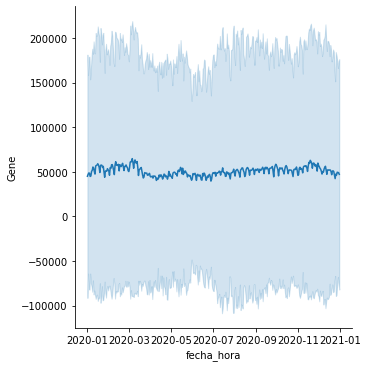

In [11]:
#plt.plot(df['Date'], df['PrecBolsNaci'])
sns.relplot( x=df['fecha_hora'].dt.date, y = df['Gene'], kind = "line", ci = "sd")

(array([ 49.,  67., 145., 111.,  60., 175., 113.,  11.,  12.,   1.]),
 array([ 78.53754495,  99.46629017, 120.39503538, 141.3237806 ,
        162.25252581, 183.18127103, 204.11001624, 225.03876146,
        245.96750667, 266.89625189, 287.8249971 ]),
 <BarContainer object of 10 artists>)

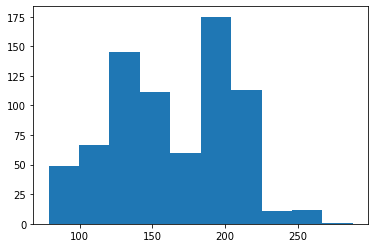

In [10]:
plt.hist(df['PrecBolsNaci'])